In [105]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [106]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(300,300)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
가위 이미지 resize 완료!


In [107]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"


# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("rock 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
rock 이미지 resize 완료!


In [108]:
# paper 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"


# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("paper 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
paper 이미지 resize 완료!


In [109]:
import numpy as np
n_of_train_data = 3000
def load_data(img_path, number_of_data):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=300
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path, 3000)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (3000, 300, 300, 3)
y_train shape: (3000,)


In [110]:
# data aug by Saeyoung & Taegyun


#Saeyoung's
# x_int64 = x_float64.astype(np.int64)
# numpy array float to int

#Taegyun
# x_int64 = x_float64.astype(np.int64)
# numpy array float to int

한번 이미지를 불러 볼까요?



라벨:  0


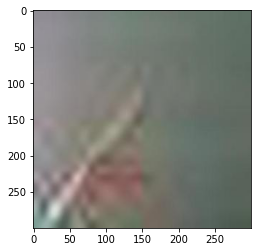

In [116]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 딥러닝 네트워크 설계하기


자 이제 데이터의 준비가 끝났습니다. 이제 여러분들이 가위바위보를 인식하는 딥러닝 네트워크를 설계해 볼까요?

import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers.experimental.preprocessing import RandomCrop,CenterCrop, RandomRotation

/* model을 직접 만들어 보세요.

Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

바꿔 볼 수 있는 하이퍼파라미터들 */
n_channel_1=16
n_channel_2=256
n_dense=128
n_train_epoch=20

model=keras.models.Sequential()

model.add(keras.layers.Dropout(0.25))

/* RGB color must be 3 */
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='elu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='elu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())


model.add(keras.layers.Dense(n_dense, activation='elu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])



In [128]:
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Input, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers.experimental.preprocessing import RandomCrop,CenterCrop, RandomRotation
from tensorflow.keras.optimizers import Adam

# frequently uased parameters
input_shape = (300,300,3)
input_shape_for_RandomCrop = (300, 30)
dropout_rate = 0.4

"""
이미지를 Augmentation 해주는 레이어를 만들어줍니다. 모델을 만들 때 augmentation layer을 넣으면 자동으로 이미지를 다양하게 변환하여 줍니다.
더 많은 augmentation을 적용해보고 싶으면 https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing 이 링크를 참조하세요.
또한, imgaug, albumentation과 같은 강력한 augmentation 라이브러리도 살펴보세요. 
"""
data_augmentation_layers = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"), #랜덤으로 이미지를 좌우로 뒤집어줌.
        layers.experimental.preprocessing.RandomRotation(0.25), #이미지를 좌우로 25% 이내로 랜덤으로 돌립니다. 
        layers.experimental.preprocessing.RandomZoom((-0.2, 0)), #이미지를 0~20%만큼 랜덤으로 축소합니다.
        layers.experimental.preprocessing.RandomCrop(300, 300),
        layers.experimental.preprocessing.RandomContrast(0.3),
    ]
)

"""
이 베이스라인에서는 transfer learning을 사용합니다. 미리 훈련되어 있는 이미지용 모델을 불러와서 그 모델의 뒤쪽에 나만의 모델을 추가한 뒤 학습하는 방식입니다.
직접 수많은 레이어의 모델을 디자인하는 것은 어렵기 때문에 이러한 방법을 사용합니다.
여기서는 구글의 EfficientNetB0를 사용합니다. 이 모델에 대한 자세한 내용은 https://arxiv.org/pdf/1905.11946.pdf 이 논문을 참고하세요.

주의!! imagenet 가중치 값을 다운받기 위하여 우측 상단 |< 표시를 누르고 setting에서 Internet을 켜줘야합니다.
"""
efficientnet = EfficientNetB3(weights="imagenet", #이미지넷 가중치 값을 불러와 적용
                              include_top=False, 
                              input_shape=input_shape, 
                              drop_connect_rate=dropout_rate) #efficientnetB0 모델을 로드
efficientnet.trainable=True # efficientnetb3의 학습을 허용. 만약 False로 지정할 시에 정확도는 떨어지지만 학습 속도가 매우 빨라짐.

In [129]:
"""
자신만의 CNN 모델을 직접 만들어 보아도 괜찮습니다.
"""
model = Sequential() #새 Sequential 모델을 만듬 
model.add(Input(shape=input_shape)) #인풋을 이미지 사이즈로 설정
model.add(data_augmentation_layers) #이미지 augumentation 레이어 추가
model.add(efficientnet) # efficientnetb0 추가
model.add(layers.GlobalAveragePooling2D()) # 풀링 레이어를 추가
model.add(layers.Dropout(dropout_rate)) # 드롭아웃 레이어를 추가
model.add(Dense(3, activation="softmax")) #마지막 덴스 레이어를 추가. 예측할 클래스의 개수만큼이 아웃풋이 된다. 
model.summary() #모델 확인

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_29 (Sequential)   (None, 300, 300, 3)       0         
_________________________________________________________________
efficientnetb3 (Functional)  (None, 10, 10, 1536)      10783535  
_________________________________________________________________
global_average_pooling2d_11  (None, 1536)              0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 1536)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 4611      
Total params: 10,788,146
Trainable params: 10,700,843
Non-trainable params: 87,303
_________________________________________________________________


In [130]:
print(x_train.shape)

# (# of data, sizr x, size y, RGB)

(3000, 300, 300, 3)


### 딥러닝 네트워크 학습시키기


잘 설계가 되었다면, 이제 학습을 시켜봅시다. 아마도 여러분들의 데이터는 거의 비슷비슷할 것이기 때문에 accuracy가 꽤 높게 나올 것입니다.



In [132]:
#todo = create model

# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.

# 모델 훈련
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=15)

# 모델 시험

Epoch 1/15
 1/94 [..............................] - ETA: 27:32 - loss: 0.8501 - accuracy: 0.5938

ResourceExhaustedError:  OOM when allocating tensor with shape[32,2304,10,10] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node sequential_30/efficientnetb3/block7b_bn/FusedBatchNormV3 (defined at <ipython-input-132-a4391ea5e027>:11) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_222511]

Function call stack:
train_function


### 얼마나 잘 만들었는지 확인하기(테스트)


여러분들은 300장의 가위바위보 이미지를 만들어 모두 학습에 사용했습니다. 그러므로 테스트 데이터가 없죠. 옆 친구의 이미지 데이터 300장을 받아오세요. 그리고 그것을 테스트 데이터로 하여 test accuracy를 측정해보세요. (만약 웹캠이 없는 경우 섹션을 진행하신 경우, 이미 test 데이터셋이 준비돼있으니 친구에게 조르지 않으셔도 됩니다)

In [ ]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")


# paper 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("paper 이미지 resize 완료!")


# rock 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("rock 이미지 resize 완료!")

In [ ]:
image_dir_path_test = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path_test, 297)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트용 데이터가 준비되었으니, 위에서 훈련시킨 model을 사용하여 test_accuracy를 측정해 봅시다.

In [ ]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]

test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

# 왜 loss가 높지??

### 더 좋은 네트워크 만들어보기


시험용 데이터x_test에 대한 인식률 test accuracy가 train accuracy보다 많이 낮게 나오지는 않았나요? 만약 그렇다면 그 이유는 무엇일까요? MNIST 손글씨 데이터 때처럼 test accuracy가 train accuracy에 근접하도록 개선 방법을 찾아 봅시다.



### 노드를 마치며...
여러분 미니 프로젝트는 잘 마치셨나요? 여러분은 이번 노드를 통해 다음의 내용을 배웠습니다.

이미 잘 정제된 10개 클래스의 숫자 손글씨 데이터를 분류하는 classifier 만들기
정제되지 않은 웹캠 사진으로부터 데이터 만들어보기
흑백 사진이 아닌 컬러 사진을 학습하는 classifier 만들기
분류하고자 하는 클래스의 개수를 마음대로 조절하기 (10개에서 3개로)
그러면 오늘 배운 내용을 바탕으로 마스크 쓴 사람과 안 쓴 사람을 구분하는 프로젝트도 금방 만드실 수 있겠죠? AIFFEL 입구에서 마스크 안 쓴 사람을 자동으로 감지하고 알람을 주는 시스템을 만들어 주실 용자분 계실까요?!!!

### git 복습

git init or git clone <-권장 #현재 디렉토리를 버전 저장소로 만듭니다. 

git config --global user.name <닉넴> #이 설정은 /.gitconfig파일에 저장되고 1번만 해주면 됩니다. 

git config --global user.email <이메일> 

git remote add origin <user_id>:<user_pw_token> 

git clone <user_id>:<user_pw_token>@repo주소 

git config -l(L소문자) # 위 설정값 확인, 실수 있으면 수정 가능

git status # git 현재상태 확인 git add "File Name" # 현재 변동사항 전부 commit하고 싶다는 표현.

git commit -m <설명> #commit 및 설명 

git branch -M main 
git config --system --unset credential.helper # config 값 초기화 f


etal authentication failed for github 오류시 git config credential.helper.store # 토큰 재입력 안해도 괜찮아집니다. 

git push origin main